#HR DATA ANALYSIS

This HR Analysis is performed on the HR Dataset. In the following steps, we will perform Data Preprocessing, EDA and Feature Engineering to get some new information.

Some of the ordinal category columns are already encoded in the dataset but for the better understanding, here is the pre encoded categories:

---


**Education**
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

**EnvironmentSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**JobInvolvement**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**JobSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**PerformanceRating**
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

**RelationshipSatisfaction**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

**WorkLifeBalance**
1 'Bad' 2 'Good' 3 'Better' 4 'Best'



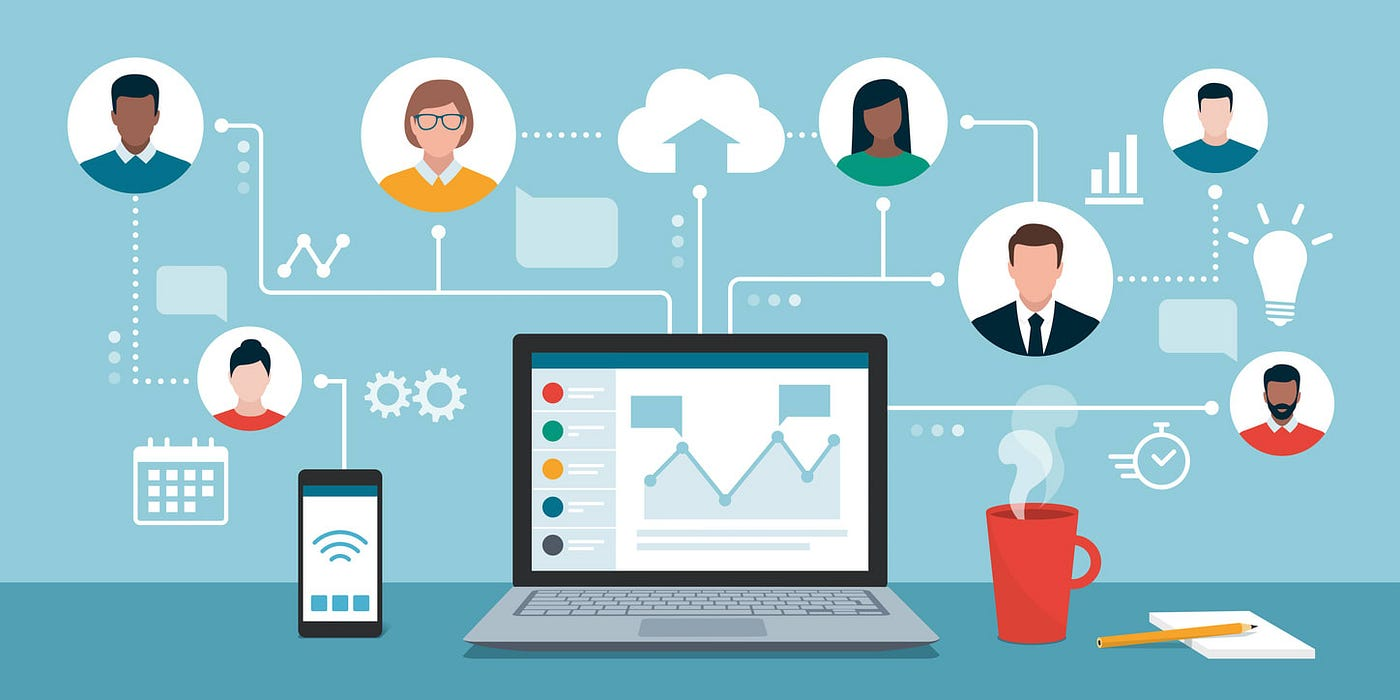

In [14]:
#Importing the necessary libraries
import numpy as np
import pandas as pd

In [15]:
#Reading the dataset
hr = pd.read_csv("/content/HR Data.csv")

In [16]:
#How big is the data?
hr.shape

(1470, 35)

In [17]:
#How does the data look like?
hr.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
#What is the datatype of columns?
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
#Are there any missing value?
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [41]:
#Is there any Nan value?
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
#How does the data look like mathematecally?
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
hr.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [22]:
#Are there any duplicated values?
hr.duplicated().sum()

0

In [23]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

To find the correlation between the columns as we don't have any target column so by using some domain knowledge. We are going to use the corr() function with all the int and float columns.

In [24]:
columns = hr.select_dtypes(include=['int', 'float'])
for i in columns:
  print(i)

Age
DailyRate
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


##Common guidelines for interpreting the strength of correlation coefficients are:

80 to 100 (or -80 to -00): **Very strong correlation**

60 to 80 (or -60 to -80): **Strong correlation**

40 to 60 (or -40 to -60): **Moderate correlation**

20 to 40 (or -20 to -40): **Weak correlation**

0 to 20 (or 0 to -20): **Very weak correlation**

<br>

*We have selected **threshold** 60 so we only get strong and very strong correlation.*

In [25]:
# ANSI escape codes for colors
GREEN = '\033[92m'
RED = '\033[91m'
ENDC = '\033[0m'  # End formatting

new_cols = {"col_0": columns.corr()["Age"]* 100,
            "col_1": columns.corr()["DailyRate"]* 100,
            "col_2": columns.corr()["DistanceFromHome"]* 100,
            "col_3": columns.corr()["Education"]* 100,
            "col_4": columns.corr()["EmployeeCount"]* 100,
            "col_5": columns.corr()["EmployeeNumber"]* 100,
            "col_6": columns.corr()["EnvironmentSatisfaction"]* 100,
            "col_7": columns.corr()["HourlyRate"]* 100,
            "col_8": columns.corr()["JobInvolvement"]* 100,
            "col_9": columns.corr()["JobLevel"]* 100,
            "col_10": columns.corr()["JobSatisfaction"]* 100,
            "col_11": columns.corr()["MonthlyIncome"]* 100,
            "col_12": columns.corr()["MonthlyRate"]* 100,
            "col_13": columns.corr()["NumCompaniesWorked"]* 100,
            "col_14": columns.corr()["PercentSalaryHike"]* 100,
            "col_15": columns.corr()["PerformanceRating"]* 100,
            "col_16": columns.corr()["RelationshipSatisfaction"]* 100,
            "col_17": columns.corr()["StandardHours"]* 100,
            "col_18": columns.corr()["StockOptionLevel"]* 100,
            "col_19": columns.corr()["TotalWorkingYears"]* 100,
            "col_20": columns.corr()["TrainingTimesLastYear"]* 100,
            "col_21": columns.corr()["WorkLifeBalance"]* 100,
            "col_22": columns.corr()["YearsAtCompany"]* 100,
            "col_23": columns.corr()["YearsInCurrentRole"]* 100,
            "col_24": columns.corr()["YearsSinceLastPromotion"]* 100,
            "col_25": columns.corr()["YearsWithCurrManager"]* 100}

threshold = 60

for col in new_cols:
  pas = new_cols.get(col)
  filter_corr = pas[(pas >= threshold) | (pas <= -threshold)]
  print(GREEN + f"{filter_corr}" + ENDC ,"\n" )

Age                  100.000000
TotalWorkingYears     68.038054
Name: Age, dtype: float64 

DailyRate    100.0
Name: DailyRate, dtype: float64 

DistanceFromHome    100.0
Name: DistanceFromHome, dtype: float64 

Education    100.0
Name: Education, dtype: float64 

Series([], Name: EmployeeCount, dtype: float64) 

EmployeeNumber    100.0
Name: EmployeeNumber, dtype: float64 

EnvironmentSatisfaction    100.0
Name: EnvironmentSatisfaction, dtype: float64 

HourlyRate    100.0
Name: HourlyRate, dtype: float64 

JobInvolvement    100.0
Name: JobInvolvement, dtype: float64 

JobLevel             100.000000
MonthlyIncome         95.029991
TotalWorkingYears     78.220780
Name: JobLevel, dtype: float64 

JobSatisfaction    100.0
Name: JobSatisfaction, dtype: float64 

JobLevel              95.029991
MonthlyIncome        100.000000
TotalWorkingYears     77.289325
Name: MonthlyIncome, dtype: float64 

MonthlyRate    100.0
Name: MonthlyRate, dtype: float64 

NumCompaniesWorked    100.0
Name: NumC

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

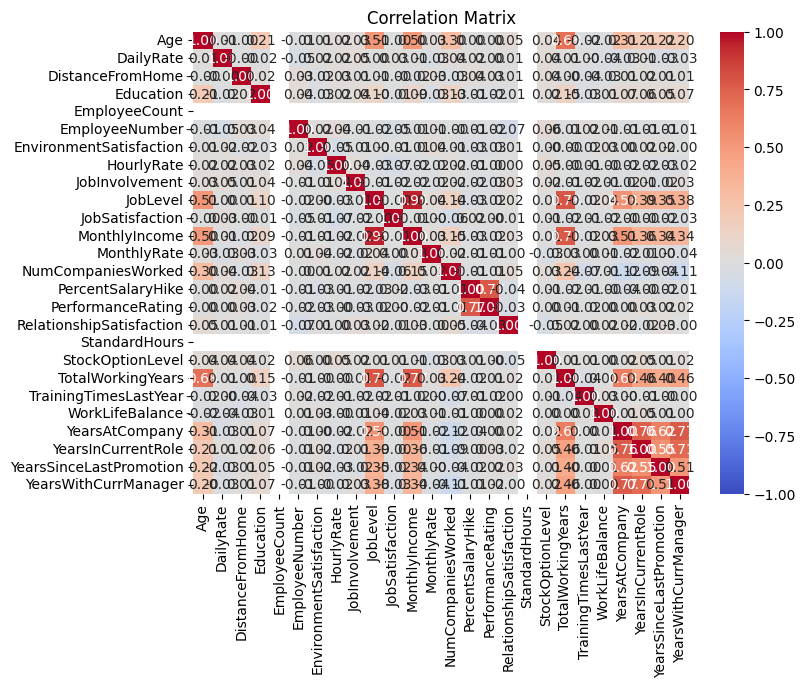

In [27]:
# Create heatmap
correlation_matrix =  hr.select_dtypes(include=['int','float']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

##Now you can see the correlation, we are going to perform **EDA** with the following relationship.

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

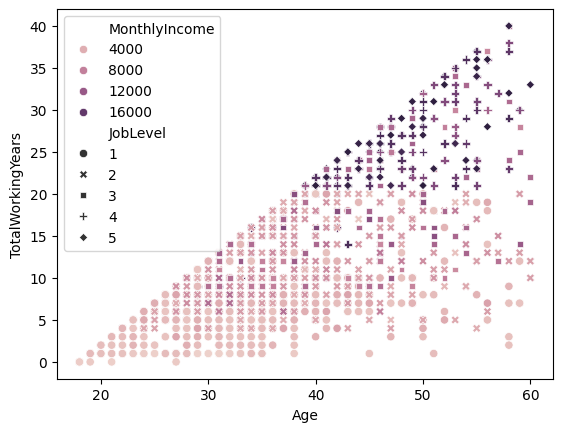

In [28]:
sns.scatterplot(x= "Age",y = "TotalWorkingYears", hue = "MonthlyIncome", data =hr , style = "JobLevel")

Chi-square statistic: 26.91264729361271
P-value: 0.042464326545470076


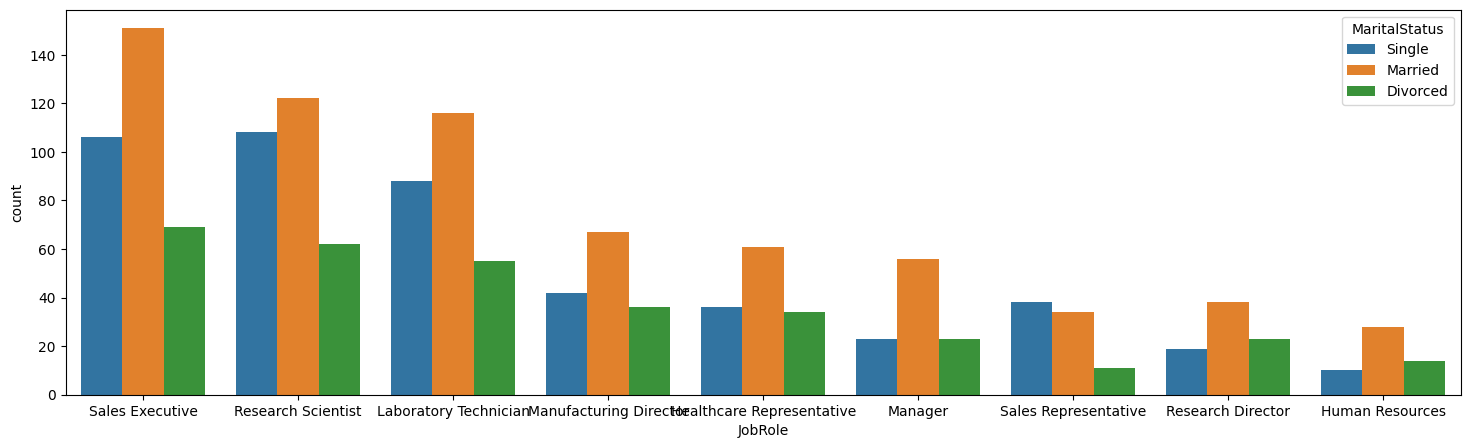

In [29]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(hr['JobRole'], hr['MaritalStatus'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Visualization
plt.figure(figsize=(18, 5))
sns.countplot(x='JobRole',hue='MaritalStatus', data=hr)
plt.show()

<ipython-input-30-c7f25659e4c2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='EducationField', y='Gender', hue='Department', data=hr, ci='sd')


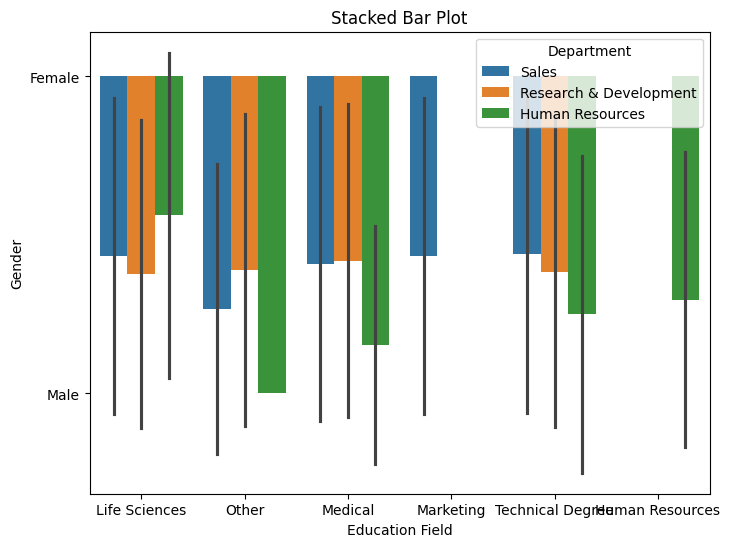

In [30]:
# Create stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='EducationField', y='Gender', hue='Department', data=hr, ci='sd')

# Add labels and title
plt.xlabel('Education Field')
plt.ylabel('Gender')
plt.title('Stacked Bar Plot')

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


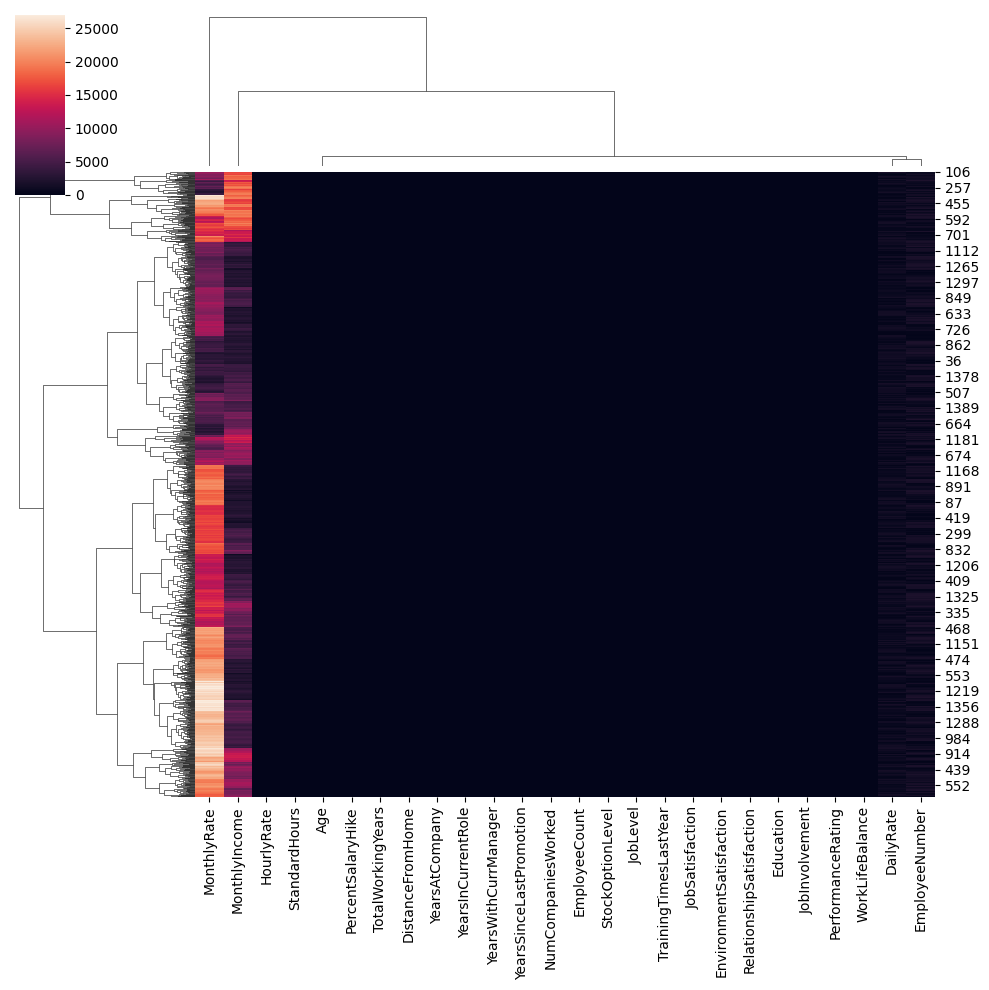

In [31]:
num_cols = hr.select_dtypes(include=['int','float'])
sns.clustermap(num_cols)

##let's find some insight for clustermap deepdown for multiple columns

In [32]:
com1 = pd.crosstab(hr["Age"], hr["JobLevel"])
com2 = pd.crosstab(hr["Age"], hr["MonthlyIncome"])
com3 = pd.crosstab(hr["Age"], hr["TotalWorkingYears"])
com4 = pd.crosstab(hr["Age"], hr["YearsAtCompany"])
com5 = pd.crosstab(hr["JobLevel"], hr["MonthlyIncome"])
com6 = pd.crosstab(hr["JobLevel"], hr["TotalWorkingYears"])
com7 = pd.crosstab(hr["MonthlyIncome"], hr["TotalWorkingYears"])
com8 = pd.crosstab(hr["PercentSalaryHike"], hr["PerformanceRating"])
com9 = pd.crosstab(hr["TotalWorkingYears"], hr["YearsAtCompany"])
com10 = pd.crosstab(hr["YearsAtCompany"],hr["YearsInCurrentRole"])
com11 = pd.crosstab(hr["YearsAtCompany"],hr["YearsWithCurrManager"])
com12 = pd.crosstab(hr["YearsInCurrentRole"], hr["YearsWithCurrManager"])
com13 = pd.crosstab(hr["YearsSinceLastPromotion"], hr["YearsAtCompany"])

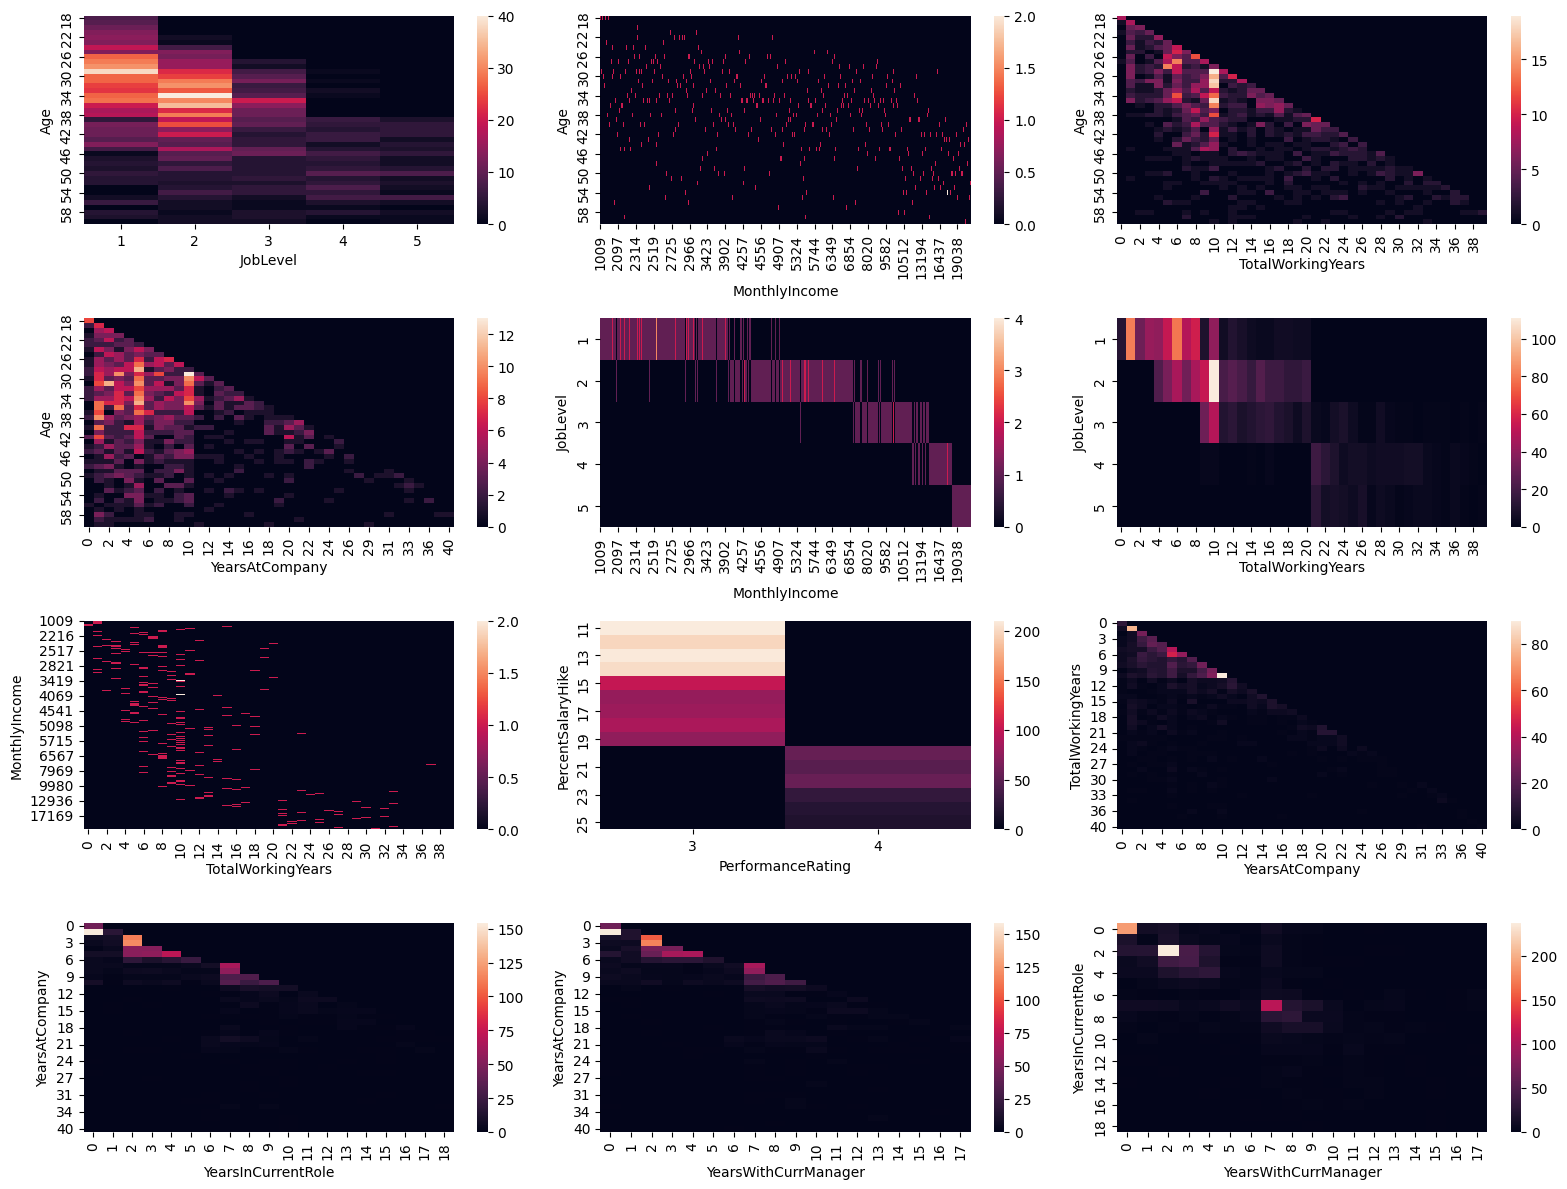

In [38]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(4,3, figsize=(16, 12))

# Plot 1:
sns.heatmap(com1, ax=axes[0, 0])
# Plot 2:
sns.heatmap(com2, ax=axes[0, 1])
# Plot 3:
sns.heatmap(com3, ax=axes[0, 2])
# Plot 4:
sns.heatmap(com4, ax=axes[1, 0])
# Plot 5:
sns.heatmap(com5, ax=axes[1, 1])
# Plot 6:
sns.heatmap(com6, ax=axes[1, 2])
# Plot 7:
sns.heatmap(com7, ax=axes[2, 0])
# Plot 8:
sns.heatmap(com8, ax=axes[2, 1])
# Plot 9:
sns.heatmap(com9, ax=axes[2, 2])
# Plot 10:
sns.heatmap(com10, ax=axes[3, 0])
# Plot 11:
sns.heatmap(com11, ax=axes[3, 1])
# Plot 12:
sns.heatmap(com12, ax=axes[3, 2])

# Adjust layout
plt.tight_layout()
plt.show()



###Now we have analysed with different EDA plot and graphs and Found some columns that are not relevant anymore and has no correlation with other columns.

In [52]:
columns_to_drop  = ['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

In [53]:
New_hr_dataset = hr.drop(columns=columns_to_drop)

In [56]:
New_hr_dataset.head(5)

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,Over18,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,Life Sciences,Female,2,Sales Executive,Single,5993,Y,Yes,11,3,8,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,Life Sciences,Male,2,Research Scientist,Married,5130,Y,No,23,4,10,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,Other,Male,1,Laboratory Technician,Single,2090,Y,Yes,15,3,7,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,Life Sciences,Female,1,Research Scientist,Married,2909,Y,Yes,11,3,8,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,Medical,Male,1,Laboratory Technician,Married,3468,Y,No,12,3,6,2,2,2,2
